In [11]:
#load the data
import pandas as pd
import numpy as np
data = pd.read_csv('transfer_data.csv')
data.head()

,x,y
0,-5.0,25.00
1,-4.9,24.01
2,-4.8,23.04
3,-4.7,22.09
4,-4.6,21.16


In [12]:
#define x and y
X = data.loc[:,'x']
y = data.loc[:,'y']
y.head()

0    25.00
1    24.01
2    23.04
3    22.09
4    21.16
Name: y, dtype: float64

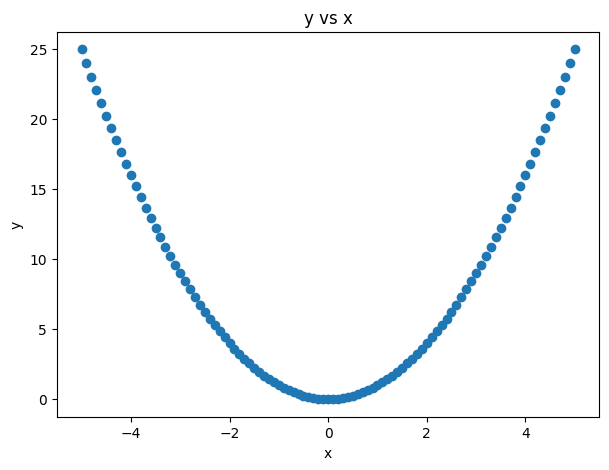

In [13]:
#visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(7,5))
plt.scatter(X,y)
plt.title('y vs x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:
X = np.array(X).reshape(-1,1)
print(X.shape,y.shape)

(101, 1) (101,)


In [21]:
from keras.models import Sequential
from keras.layers import Dense
model1 = Sequential()
model1.add(Dense(units=50, input_dim = 1, activation='relu'))
model1.add(Dense(units=50,activation='relu'))
model1.add(Dense(units=1, activation = 'linear'))
model1.compile(optimizer='adam',loss='mean_squared_error')
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                100       
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


In [28]:
#train the model
model1.fit(X,y,epochs=200)

Epoch 1/200
4/4 [==============================] - 0s 2ms/step - loss: 1.2036
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 1.1792
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 1.1635
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1371
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1175
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 1.1029
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 1.1001
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 1.0933
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 1.0792
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 1.0484
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0207
Epoch 12/200
4/4 [==============================] - 0s 3ms/step - loss: 1.0078
Epoch 13/200
4/4 [==============================] - 0s 3ms/st

4/4 [==============================] - 0s 2ms/step - loss: 0.3237
Epoch 105/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3171
Epoch 106/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2926
Epoch 107/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2872
Epoch 108/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2903
Epoch 109/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2852
Epoch 110/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2779
Epoch 111/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2720
Epoch 112/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2854
Epoch 113/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2821
Epoch 114/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2700
Epoch 115/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2669
Epoch 116/200
4/4 [==============================] - 0

In [29]:
#make prediction
y_predict = model1.predict(X)

4/4 [==============================] - 0s 2ms/step


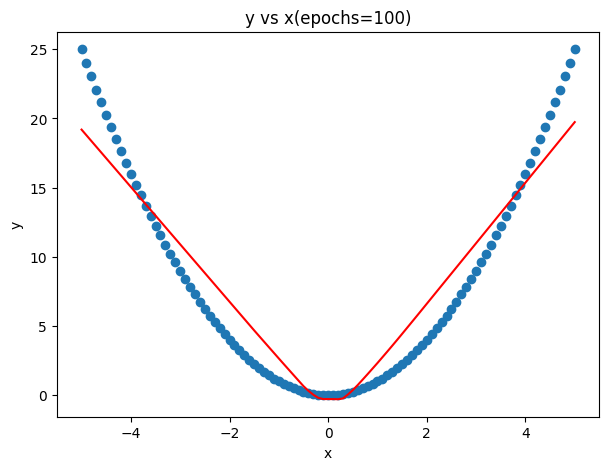

In [24]:
fig2 = plt.figure(figsize=(7,5))
plt.scatter(X,y)
plt.plot(X,y_predict,'r')
plt.title('y vs x(epochs=100)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

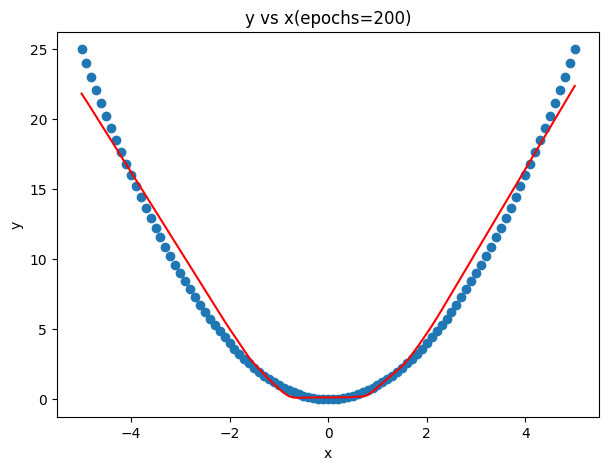

In [27]:
fig3 = plt.figure(figsize=(7,5))
plt.scatter(X,y)
plt.plot(X,y_predict,'r')
plt.title('y vs x(epochs=200)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

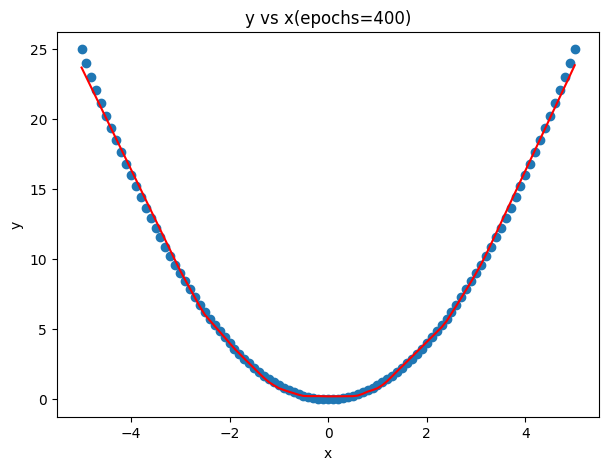

In [30]:
fig4 = plt.figure(figsize=(7,5))
plt.scatter(X,y)
plt.plot(X,y_predict,'r')
plt.title('y vs x(epochs=400)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [31]:
#模型保存
model1.save('model1.h5')

In [42]:
#加载模型
import keras
model2 = keras.models.load_model('model1.h5')

In [43]:
data2 = pd.read_csv('transfer_data2.csv')
data2.head()

,x2,y2
0,-5.0,26.00
1,-4.9,25.21
2,-4.8,24.44
3,-4.7,23.69
4,-4.6,22.96


In [44]:
#define x2 and y2
X2 = data2.loc[:,'x2']
y2 = data2.loc[:,'y2']

In [45]:
X2 = np.array(X2).reshape(-1,1)
print(X2.shape)

(101, 1)


In [46]:
y2_predict = model2.predict(X2)

4/4 [==============================] - 0s 2ms/step


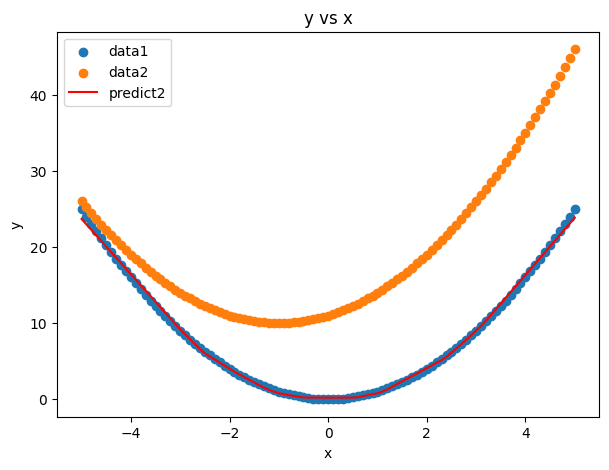

In [47]:
fig5 = plt.figure(figsize=(7,5))
plt.scatter(X,y,label = 'data1')
plt.scatter(X2,y2 , label = 'data2')
plt.plot(X,y2_predict,'r',label='predict2')
plt.title('y vs x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [54]:
#transfer learning
model2.fit(X2,y2,epochs=20)

Epoch 1/20
4/4 [==============================] - 0s 2ms/step - loss: 8.7145
Epoch 2/20
4/4 [==============================] - 0s 5ms/step - loss: 8.1087
Epoch 3/20
4/4 [==============================] - 0s 3ms/step - loss: 7.5404
Epoch 4/20
4/4 [==============================] - 0s 2ms/step - loss: 7.0266
Epoch 5/20
4/4 [==============================] - 0s 4ms/step - loss: 6.5359
Epoch 6/20
4/4 [==============================] - 0s 3ms/step - loss: 6.1476
Epoch 7/20
4/4 [==============================] - 0s 3ms/step - loss: 5.7433
Epoch 8/20
4/4 [==============================] - 0s 3ms/step - loss: 5.3751
Epoch 9/20
4/4 [==============================] - 0s 4ms/step - loss: 4.9360
Epoch 10/20
4/4 [==============================] - 0s 4ms/step - loss: 4.5779
Epoch 11/20
4/4 [==============================] - 0s 3ms/step - loss: 4.1891
Epoch 12/20
4/4 [==============================] - 0s 3ms/step - loss: 3.8342
Epoch 13/20
4/4 [==============================] - 0s 3ms/step - loss: 3.

In [55]:
y2_predict = model2.predict(X2)

4/4 [==============================] - 0s 2ms/step


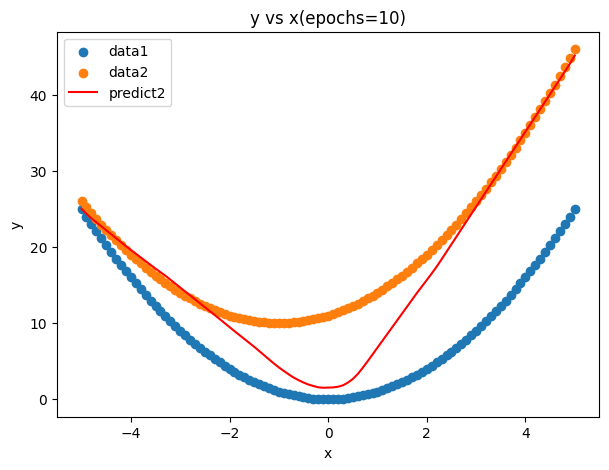

In [50]:
fig6 = plt.figure(figsize=(7,5))
plt.scatter(X,y,label = 'data1')
plt.scatter(X2,y2 , label = 'data2')
plt.plot(X,y2_predict,'r',label='predict2')
plt.title('y vs x(epochs=10)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

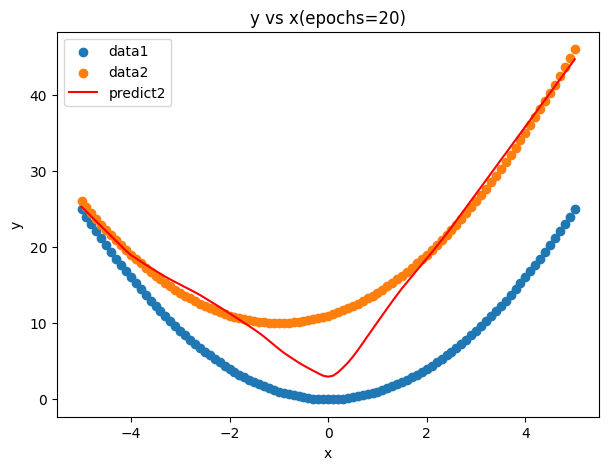

In [53]:
fig7 = plt.figure(figsize=(7,5))
plt.scatter(X,y,label = 'data1')
plt.scatter(X2,y2 , label = 'data2')
plt.plot(X,y2_predict,'r',label='predict2')
plt.title('y vs x(epochs=20)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

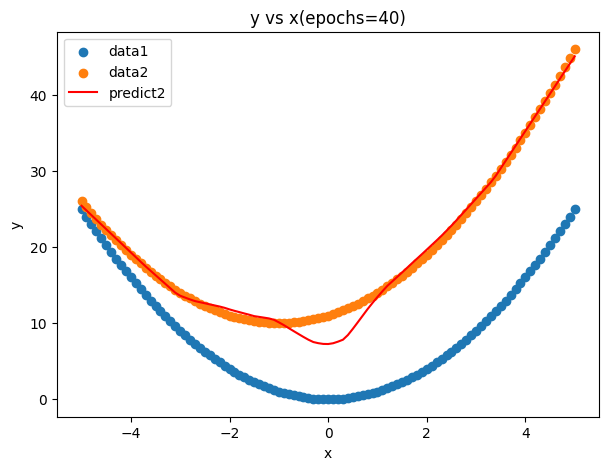

In [56]:
fig8 = plt.figure(figsize=(7,5))
plt.scatter(X,y,label = 'data1')
plt.scatter(X2,y2 , label = 'data2')
plt.plot(X,y2_predict,'r',label='predict2')
plt.title('y vs x(epochs=40)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()